In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 13

# Fourier transform

### Integeration Function

In [3]:
#we defined this function previosly in the integration notebook
#we will use it to get the fourier transform later on
def trapazoidIntegration(data):
   return 0.5 * np.sum(np.array([(data[1,i+1]+data[1,i]) * (data[0,i+1]-data[0,i])for i in range (len(data[0])-1)]))

### Generating Function And Data

In [4]:
# Defining numerical values to work with it.
timePoints=501
timeArray=np.linspace(0,50,timePoints)

#random frequencies that we will try to find later using Fourier transform

freq1=0.7
freq2=1.8
freq3=2.7

#random phase angles
phaseAngle1=1
phaseAngle2=2
phaseAngle3=3

#random amplitudes
amp1=0.7
amp2=0.6
amp3=1.4
#random function to work with
fArray= amp1*np.sin(timeArray*freq1+phaseAngle1)+amp2*np.cos(timeArray*freq2+phaseAngle2)+amp3*np.sin(timeArray*freq3+phaseAngle3)

#assume we only have this data points, and not the above function, how can we find the values of the frequencies?
#that's what this notebook is about.
data=[timeArray,fArray]

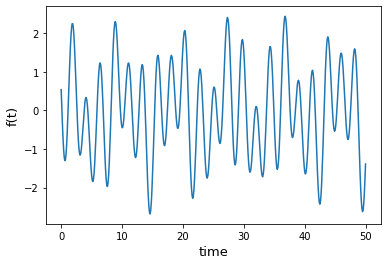

In [5]:
plt.ylabel('f(t)')
plt.xlabel('time')
plt.plot(data[0],data[1])

### Fourier Transform Equation

$$
F(\omega) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} f(t) e^{i\omega t}\mathrm{d}t
$$

## 1.Creating Fourier Transform Function

In [6]:

def fourierTransform(data,omegaNumber):
    #step size=0.01
    stepSize=omegaNumber*100+1
    return np.array([
        [omega,
        trapazoidIntegration(
        np.array([data[0],1/np.sqrt(2*np.pi)* data[1] * np.exp(1j*omega*timeArray)]))] for omega in np.linspace(0,omegaNumber,stepSize) 
        ]) 
         
    

In [7]:
#from the plot, you can safely guess that omega doesn't exceed 10
ft=fourierTransform(data,10)

### Plotting And Getting Results

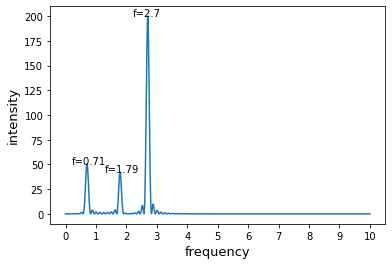

In [8]:
plt.xlabel('frequency')
plt.ylabel('intensity')
plt.xticks(range(0,11))
plt.plot(ft[:,0].real,abs(ft[:,1])**2)

#we can see that there are 3 peaks, which represents the frequencies we are trying to find
peaks=3
#we can identify the interval in which these peaks are from the plot easily.
lastPeak=0
peak=1
scale=100 #since step size =0.01

ftCopy=ft.copy() 
ftCopy[:,1]=abs(ft[:,1])**2 #saving the magnitude squared in a differet array
for i in range (peaks):
    intensity=max(ftCopy[lastPeak*scale:peak*scale,1])
    freq=ft[np.argmax(ftCopy[lastPeak*scale:peak*scale,1]),0]
    plt.annotate(f'f={freq.real +i}', xy=(freq.real+i -0.5, intensity.real))  # -0.5 here is just to adjust the position
    #write the numerical values of the frequencies at which the peaks occured.
    peak=peak+1
    lastPeak=lastPeak+1

## 2.Using Numpy Fast Fourier Transform

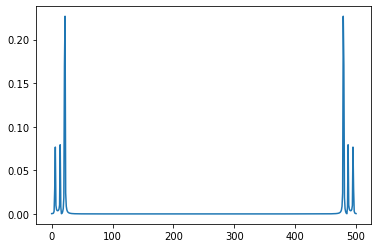

In [64]:
ft2 = np.fft.fft(fArray)/len(fArray)
plt.plot(abs(ft2)**2 ) 

In [81]:
pointsNumber=len(fArray)
xLimit=10
frequencies = np.linspace(0,xLimit,pointsNumber)

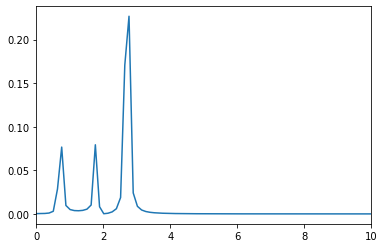

In [82]:
plt.xlim([0,10])
plt.plot( 2*np.pi*frequencies, abs(ft2)**2 ) 